In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

0.1 [8.28335749e-06] [3.31992243e-07] 0.9448234528647249


Text(0.5, 0, 'Rounds, $t$')

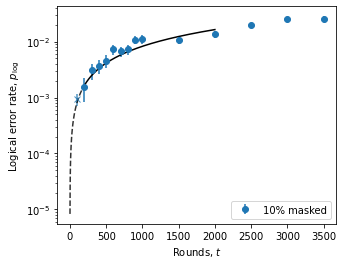

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

df = pd.read_csv('./84_70_5_6/iterative_masked_decoding.res')
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
# df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
guesses = []
params = []

def fun(x, a):
    return 1 - (1 - a)**x

p_masks = [0.1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i, j in enumerate(p_masks):
    if (j == 0.5):
        tmp_df = df[(df['p_mask'] == j) & (df['algo'] >= 200) & (df['p_std_dev'] > 0)]
    else:
        tmp_df = df[(df['p_mask'] == j) & (df['algo'] >= 200) & (df['p_std_dev'] > 0)]
    
    tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
    tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

    ax.errorbar(tmp_df_fit['algo'], tmp_df_fit['p_error'], tmp_df_fit['p_std_dev'], label=f'{int(j*100)}% masked', fmt='o', c=colors[i])
    ax.errorbar(tmp_df_before['algo'], tmp_df_before['p_error'], tmp_df_before['p_std_dev'], fmt='x', alpha=0.8)

    popt, pcov = curve_fit(fun, tmp_df['algo'], tmp_df['p_error'], maxfev=1000, p0=(0.001),
        sigma=tmp_df['p_std_dev'])
    print(j, popt, np.sqrt(np.diag(pcov)), r2_score(tmp_df['p_error'], fun(tmp_df['algo'], *popt)))
    params.append(popt[0])
    xx = np.linspace(1, 2000, 1000)
    yy = fun(xx, *popt)
    ax.plot(xx[100:], yy[100:], c='k')
    ax.plot(xx[:100], yy[:100], c='k', linestyle='--', alpha=0.8)


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

# ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
# ax[1].set_xlabel('$p$')

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])